<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подключение-к-базе-данных-и-первичны-обзор-данных" data-toc-modified-id="Подключение-к-базе-данных-и-первичны-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подключение к базе данных и первичны обзор данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-настройка-графиков" data-toc-modified-id="Импорт-библиотек-и-настройка-графиков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и настройка графиков</a></span></li><li><span><a href="#Используемые-функции" data-toc-modified-id="Используемые-функции-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Используемые функции</a></span></li><li><span><a href="#Подключение-к-БД" data-toc-modified-id="Подключение-к-БД-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подключение к БД</a></span></li><li><span><a href="#Описание-таблиц" data-toc-modified-id="Описание-таблиц-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Описание таблиц</a></span></li><li><span><a href="#Первичный-обзор-данных" data-toc-modified-id="Первичный-обзор-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Первичный обзор данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Обработка-пропущенных-значений-в-TotalCharges" data-toc-modified-id="Обработка-пропущенных-значений-в-TotalCharges-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропущенных значений в <code>TotalCharges</code></a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Объединение таблиц</a></span></li></ul></li></ul></div>

[![image.jpg](material/preview.jpg)](material/preview.jpg)

# Проект: Прогнозирование оттока клиентов для интеренет провайдера

**ПОСТАНОВКА ЗАДАЧИ**  

**Заказчик исследования:**  
Оператор связи **«ТелеДом»**, предоставляющий услуги телефонной связи и интернета.  


**Исходные данные:**  
Исторические данные о клиентах оператора, включающие:  
- **Информацию о договорах:** дата начала и окончания, тип оплаты, расходы.  
- **Персональные данные:** пол, возраст, семейное положение.  
- **Информацию об интернет-услугах:** тип подключения, наличие дополнительных сервисов.  
- **Информацию о телефонных услугах:** использование нескольких телефонных линий.  
Данные хранятся в **SQLite** и актуальны на **1 февраля 2020 года**.  


**Цель исследования:**  
Разработать модель машинного обучения, предсказывающую вероятность ухода клиента (расторжения договора), чтобы оператор мог заранее принимать меры для удержания клиентов.  


**Задачи исследования:**  
1. Проанализировать данные и определить ключевые факторы, влияющие на отток клиентов.  
2. Подготовить данные для обучения модели, обработать пропуски и аномалии.  
3. Обучить и оценить несколько моделей машинного обучения, выбрав лучшую по метрике **ROC-AUC**.  
4. Определить наиболее важные признаки, влияющие на отток клиентов.  
5. Разработать бизнес-рекомендации для оператора на основе полученных результатов.  


**ХОД ИССЛЕДОВАНИЯ**  

**1. Сбор и подготовка данных:**  
- Подключение к базе данных **SQLite**, загрузка таблиц: **contract, personal, internet, phone**.  
- Первичный анализ данных: проверка наличия пропусков, аномалий, дубликатов.  
- Объединение таблиц в единый датафрейм по **customerID**.  
- Генерация новых признаков, например, **длительность контракта**.  


**2. Исследовательский анализ данных (EDA):**  
- Анализ распределения признаков и их влияния на отток.  
- Визуализация распределения признаков, выявление закономерностей.  
- Корреляционный анализ признаков.  


**3. Создание и обучение модели:**  
- Кодирование категориальных признаков, масштабирование числовых.  
- Разделение данных на **обучающую (75%) и тестовую (25%)** выборки.  
- Обучение нескольких моделей:  
  - **Случайный лес**  
  - **Градиентный бустинг (CatBoost, LightGBM)**  
  - **Нейронные сети**  
- Подбор гиперпараметров с **HalvingGridSearchCV / Optuna**.  
- Выбор лучшей модели по метрике **ROC-AUC**.  


**4. Оценка модели:**  
- Тестирование финальной модели на отложенной выборке.  
- Оценка **ROC-AUC, Accuracy, Precision, Recall**.  
- Построение **матрицы ошибок**.  
- Анализ важности признаков.  


**5. Выводы и рекомендации:**  
- Анализ результатов модели и определение ключевых факторов оттока клиентов.  
- Выявление групп клиентов с наибольшей вероятностью ухода.  
- Бизнес-рекомендации оператору связи для снижения оттока:  
  - Улучшение тарифных планов.  
  - Целевая работа с клиентами, склонными к уходу.  
  - Развитие дополнительных услуг.  

## Подключение к базе данных и первичны обзор данных

### Импорт библиотек и настройка графиков

Импортируем библиотеки torch, pandas, numpy, matplotlib, seaborn, sklearn, shap и другие. Также в проекте изспользуются эмоджи c сайта [emojipedia](https://emojipedia.org/) для более наглядного отображения.

In [1]:
# Импорт стандартных библиотек
import os
import re

# Импорт библиотек для научных вычислений и визуализации данных
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Импорт библиотек для работы с БД
from sqlalchemy import create_engine, inspect

In [2]:
# Константы
RANDOM_STATE = 160225
LINE_1 = '-' * 125

### Используемые функции

In [3]:
# Функция для выполнения SQL-запроса и отображения результатов
def execute_query(query):
    return pd.read_sql(query, engine)

In [4]:
# Функция для проверки пропусков по каждому столбцу
def check_nulls(table_name):
    columns = get_columns(table_name)
    results = []
    
    for col in columns:
        query = f"""
        SELECT 
            '{col}' AS column_name,
            COUNT(*) AS total_rows,
            COUNT({col}) AS non_null_rows,
            COUNT(*) - COUNT({col}) AS null_values,
            (COUNT(*) - COUNT({col})) * 100.0 / COUNT(*) AS null_percentage
        FROM {table_name};
        """
        result = execute_query(query)
        results.append(result)
    
    return pd.concat(results, ignore_index=True)

In [5]:
# Функция для получения всех столбцов таблицы и их типов данных
def get_columns(table_name, filter_types=None):
    query = f"PRAGMA table_info({table_name});"
    columns_info = execute_query(query)

    # Фильтрация по типу данных, если передан список типов
    if filter_types:
        columns_info = columns_info[columns_info['type'].str.lower().isin(filter_types)]
    
    return columns_info['name'].tolist()

In [6]:
# Функция для первичного обзора данных
def data_overview(df, date_columns=None):
    """
    Функция для обзора данных, включает:
    1. Вывод первых 5 строк
    2. Общую информацию о данных
    3. Проверку пропусков (абсолютные и относительные значения)
    4. Распределение количественных столбцов
    5. Уникальные значения для категориальных столбцов
    6. Количество уникальных значений
    7. Проверку на наличие дубликатов
    8. Проверку индексов на монотонность
    9. Проверку колонок с датами на монотонность
    10. Гистограммы количественных данных (с подписями)
    11. Корреляционная матрица
    12. CountPlot для категориальных признаков
    """

    # 1. Вывод первых 5 строк
    print("1. Первые 5 строк данных:")
    display(df.head())
    print(LINE_1)

    # 2. Общая информация
    print("\n2. Информация о данных:")
    df.info()
    print(LINE_1)

    # 3. Проверка пропусков
    print("\n3. Проверка пропусков:")
    missing_abs = df.isnull().sum()
    missing_rel = (df.isnull().sum() / len(df)) * 100
    missing_df = pd.DataFrame({'Пропуски (абсолютные)': missing_abs, 'Пропуски (%)': missing_rel})
    display(missing_df[missing_df['Пропуски (абсолютные)'] > 0])
    print(LINE_1)

    # 4. Распределение количественных данных
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_cols) > 0:
        print("\n4. Распределение количественных данных:")
        display(df[numeric_cols].describe())
    else:
        print("\n4. В таблице нет количественных данных.")
    print(LINE_1)

    # 5. Количество уникальных значений
    print("\n5. Количество уникальных значений в данных:")
    display(df.nunique())
    print(LINE_1)

    # 6. Анализ категориальных данных
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    print("\n6. Уникальные значения для категориальных столбцов:")
    for col in categorical_cols:
        print(f"\nСтолбец '{col}': {df[col].nunique()} уникальных значений")
        print(df[col].value_counts().head(5))  # Топ-5 значений
    print(LINE_1)

    # 7. Проверка на дубликаты
    duplicates_count = df.duplicated().sum()
    print("\n7. Проверка на дубликаты:")
    if duplicates_count > 0:
        print(f"Найдено дубликатов: {duplicates_count}")
        display(df[df.duplicated()].head())  # Выводим примеры дубликатов
    else:
        print("Дубликатов не найдено.")
    print(LINE_1)

    # 8. Проверка индексов на монотонность
    print("\n8. Проверка индексов на монотонность:", df.index.is_monotonic_increasing)
    print("Минимальный и максимальный индекс:", df.index.min(), df.index.max())
    print(LINE_1)

    # 9. Проверка datetime на монотонность
    if date_columns:
        for col in date_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                print(f"\n9. Проверка колонки {col} на монотонность:", df[col].is_monotonic_increasing)
                print(f"Минимальная и максимальная дата в {col}:", df[col].min(), df[col].max())
    print(LINE_1)

    # 10. Гистограммы количественных данных
    if len(numeric_cols) > 0:
        print("\n10. Гистограммы количественных данных:")
        fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 4))
        if len(numeric_cols) == 1:
            axes = [axes]
        for ax, col in zip(axes, numeric_cols):
            df[col].hist(ax=ax, bins=20)
            ax.set_title(f'Распределение {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Частота')
        plt.tight_layout()
        plt.show()
    print(LINE_1)

    # 11. Корреляционная матрица
    if len(numeric_cols) > 1:
        print("\n11. Корреляционная матрица:")
        plt.figure(figsize=(4, 3))
        sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Корреляция количественных признаков")
        plt.show()
    print(LINE_1)

    # 12. CountPlot для категориальных признаков (только type == 'category')
    category_only_cols = df.select_dtypes(include=['category']).columns

    if len(category_only_cols) > 0:
        print("\n12. Распределение категориальных признаков (category):")

        cols_per_row = 2  # Число столбцов в графиках
        rows = (len(category_only_cols) + cols_per_row - 1) // cols_per_row  # Количество строк (округление вверх)

        fig, axes = plt.subplots(rows, cols_per_row, figsize=(12, rows * 4))
        axes = axes.flatten()  # Преобразуем массив осей в одномерный список

        for ax, col in zip(axes, category_only_cols):
            sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index[:10])
            ax.set_title(f'Распределение {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Частота')
            ax.tick_params(axis='x', rotation=30)  # Поворот подписей оси X

        # Отключаем пустые оси (если графиков меньше, чем ячеек)
        for i in range(len(category_only_cols), len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()
    print(LINE_1)


In [7]:
# Перевод заголовков столбцов в "змеиный" стиль
def to_snake_case(name):
    """
    Функция преобразует строку в snake_case:
    - Меняет CamelCase и PascalCase на snake_case
    - Заменяет пробелы, дефисы и другие разделители на "_"
    - Приводит всё к нижнему регистру
    """
    name = re.sub(r'([a-z])([A-Z])', r'\1_\2', name)  # Разделяет CamelCase/PascalCase
    name = re.sub(r'[\s\-]+', '_', name)  # Заменяет пробелы и дефисы на "_"
    return name.lower()

### Подключение к БД

In [8]:
path_to_db = 'database/database.db'
engine = create_engine(f'sqlite:///{path_to_db}', echo=False) 

Выведем все имена имеющих таблиц

In [9]:
# Используем инспектор для получения списка всех таблиц
inspector = inspect(engine)

# Получаем список всех таблиц
inspector.get_table_names()

['contract',
 'data_arc',
 'data_bulk',
 'data_bulk_time',
 'data_gas',
 'data_temp',
 'data_wire',
 'data_wire_time',
 'internet',
 'personal',
 'phone']

В базе данных хранятся таблицы, которые не относятся к интернет провайдеру. Сохраним в переменную `table_names` только именна тех таблиц, которые нам пригодятся.

In [10]:
table_names = ['contract', 'internet', 'personal', 'phone']

### Описание таблиц

**Таблицы в БД:**
- `contract` — информация о договорах;
- `personal` — персональные данные клиентов;
- `internet` — информация об интернет-услугах;
- `phone` — информация об услугах телефонии.


**Таблица contract**
- `customerID` — ID абонента;
- `BeginDate` — дата начала действия договора;
- `EndDate` — дата окончания действия договора;
- `Type` — тип оплаты: раз в год-два или ежемесячно;
- `PaperlessBilling` — электронный расчётный лист;
- `PaymentMethod` — тип платежа;
- `MonthlyCharges` — расходы за месяц;
- `TotalCharges` — общие расходы абонента.


**Таблица personal**
- `customerID` — ID пользователя;
- `gender` — пол;
- `SeniorCitizen` — является ли абонент пенсионером;
- `Partner` — есть ли у абонента супруг или супруга;
- `Dependents` — есть ли у абонента дети.


**Таблица internet**
- `customerID` — ID пользователя;
- `InternetService` — тип подключения;
- `OnlineSecurity` — блокировка опасных сайтов;
- `OnlineBackup` — облачное хранилище файлов для резервного копирования данных;
- `DeviceProtection` — антивирус;
- `TechSupport` — выделенная линия технической поддержки;
- `StreamingTV` — стриминговое телевидение;
- `StreamingMovies` — каталог фильмов.


**Таблица phone**
- `customerID` — ID пользователя;
- `MultipleLines` — подключение телефона к нескольким линиям одновременно.

Выведем первые 5 строк для всех таблиц

In [11]:
# Функция для вывода первых 5 строк таблицы
def display_first_rows(table_name, limit=5):
    print(f"Первые {limit} строк таблицы {table_name}:")
    query = f"""
        SELECT * 
        FROM {table_name} 
        LIMIT {limit}
    """
    display(execute_query(query))
    print(LINE_1)

# Вызов функции для разных таблиц
for tabel in table_names:
    display_first_rows(tabel)

Первые 5 строк таблицы contract:


customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  
0           Electronic check          29.85        31.04  
1               Mailed check          56.95      2071.84  
2               Mailed check          53.85       226.17  
3  Bank transfer (automatic)           42.3       1960.6  
4           Electronic check           70.7        353.5

-----------------------------------------------------------------------------------------------------------------------------
Первые 5 строк таблицы internet:


customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No

-----------------------------------------------------------------------------------------------------------------------------
Первые 5 строк таблицы personal:


customerID  gender SeniorCitizen Partner Dependents
0  7590-VHVEG  Female             0     Yes         No
1  5575-GNVDE    Male             0      No         No
2  3668-QPYBK    Male             0      No         No
3  7795-CFOCW    Male             0      No         No
4  9237-HQITU  Female             0      No         No

-----------------------------------------------------------------------------------------------------------------------------
Первые 5 строк таблицы phone:


CustomerId MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

-----------------------------------------------------------------------------------------------------------------------------


In [12]:
# Функция для получения информации о столбцах и пропусках
def display_table_info(table_names):
    for table in table_names:
        print(f"\nИнформация и пропуски для таблицы {table}:")
        
        # Получение информации о столбцах
        columns_query = f"PRAGMA table_info({table});"
        columns_info = execute_query(columns_query)
        
        # Получение информации о пропусках
        nulls_info = check_nulls(table)
        
        # Переименование столбцов для объединения данных
        columns_info = columns_info.rename(columns={'name': 'column_name', 'type': 'data_type'})
        
        # Объединение данных в один DataFrame
        combined_info = pd.merge(columns_info[['column_name', 'data_type']], nulls_info, on='column_name', how='left')
        
        # Вывод объединённой информации
        display(combined_info)
        print(LINE_1)


# Вызов функции для объединённого вывода
display_table_info(table_names)


Информация и пропуски для таблицы contract:


column_name data_type  total_rows  non_null_rows  null_values  \
0        customerID      TEXT        7043           7043            0   
1         BeginDate      TEXT        7043           7043            0   
2           EndDate      TEXT        7043           7043            0   
3              Type      TEXT        7043           7043            0   
4  PaperlessBilling      TEXT        7043           7043            0   
5     PaymentMethod      TEXT        7043           7043            0   
6    MonthlyCharges      TEXT        7043           7043            0   
7      TotalCharges      TEXT        7043           7043            0   

   null_percentage  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
5              0.0  
6              0.0  
7              0.0

-----------------------------------------------------------------------------------------------------------------------------

Информация и пропуски для таблицы internet:


column_name data_type  total_rows  non_null_rows  null_values  \
0        customerID      TEXT        5517           5517            0   
1   InternetService      TEXT        5517           5517            0   
2    OnlineSecurity      TEXT        5517           5517            0   
3      OnlineBackup      TEXT        5517           5517            0   
4  DeviceProtection      TEXT        5517           5517            0   
5       TechSupport      TEXT        5517           5517            0   
6       StreamingTV      TEXT        5517           5517            0   
7   StreamingMovies      TEXT        5517           5517            0   

   null_percentage  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
5              0.0  
6              0.0  
7              0.0

-----------------------------------------------------------------------------------------------------------------------------

Информация и пропуски для таблицы personal:


column_name data_type  total_rows  non_null_rows  null_values  \
0     customerID      TEXT        7043           7043            0   
1         gender      TEXT        7043           7043            0   
2  SeniorCitizen      TEXT        7043           7043            0   
3        Partner      TEXT        7043           7043            0   
4     Dependents      TEXT        7043           7043            0   

   null_percentage  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

-----------------------------------------------------------------------------------------------------------------------------

Информация и пропуски для таблицы phone:


column_name data_type  total_rows  non_null_rows  null_values  \
0     CustomerId      TEXT        6361           6361            0   
1  MultipleLines      TEXT        6361           6361            0   

   null_percentage  
0              0.0  
1              0.0

-----------------------------------------------------------------------------------------------------------------------------


In [13]:
def get_aggregate_stats(table_name, drop_columns=None):
    # Фильтрация числовых и категориальных столбцов
    numeric_columns = get_columns(table_name, filter_types=['integer', 'real', 'float', 'numeric'])
    categorical_columns = get_columns(table_name, filter_types=['text', 'varchar', 'char'])

    # Исключение ненужных столбцов
    if drop_columns:
        numeric_columns = [col for col in numeric_columns if col not in drop_columns]
        categorical_columns = [col for col in categorical_columns if col not in drop_columns]

    numeric_stats = None
    categorical_stats = None

    # Статистика для числовых столбцов
    if numeric_columns:
        query_parts = []
        for col in numeric_columns:
            query_parts.append(f"COUNT({col}) AS count_{col}")
            query_parts.append(f"AVG({col}) AS mean_{col}")
            query_parts.append(f"MIN({col}) AS min_{col}")
            query_parts.append(f"MAX({col}) AS max_{col}")

        query = f"SELECT {', '.join(query_parts)} FROM {table_name}"
        
        try:
            result = execute_query(query)
            result = result.round(2)

            result_transposed = result.transpose()
            result_transposed.columns = ['value']
            result_transposed.reset_index(inplace=True)
            result_transposed[['metric', 'column']] = result_transposed['index'].apply(
                lambda x: pd.Series(x.split('_', 1) if '_' in x else [x, None])
            )

            rename_dict = {
                'count': 'count',
                'mean': 'mean',
                'min': 'min',
                'max': 'max'
            }
            result_transposed['metric'] = result_transposed['metric'].replace(rename_dict)

            ordered_metrics = ['count', 'mean', 'min', 'max']
            result_transposed['metric'] = pd.Categorical(result_transposed['metric'], categories=ordered_metrics, ordered=True)
            result_transposed.sort_values(by='metric', inplace=True)

            numeric_stats = result_transposed.pivot(index='metric', columns='column', values='value')
            numeric_stats.index.name = None
            numeric_stats.columns.name = None
        except Exception as e:
            print(f"Ошибка при обработке числовых данных таблицы {table_name}: {str(e)}")

    # Статистика для категориальных столбцов
    if categorical_columns:
        query_parts = []
        for col in categorical_columns:
            query_parts.append(f"COUNT({col}) AS count_{col}")
            query_parts.append(f"COUNT(DISTINCT {col}) AS unique_{col}")

        query = f"SELECT {', '.join(query_parts)} FROM {table_name}"

        try:
            result = execute_query(query)
            result_transposed = result.transpose()
            result_transposed.columns = ['value']
            result_transposed.reset_index(inplace=True)
            result_transposed[['metric', 'column']] = result_transposed['index'].apply(
                lambda x: pd.Series(x.split('_', 1) if '_' in x else [x, None])
            )

            ordered_metrics = ['count', 'unique']
            result_transposed['metric'] = pd.Categorical(result_transposed['metric'], categories=ordered_metrics, ordered=True)
            result_transposed.sort_values(by='metric', inplace=True)

            categorical_stats = result_transposed.pivot(index='metric', columns='column', values='value')
            categorical_stats.index.name = None
            categorical_stats.columns.name = None
        except Exception as e:
            print(f"Ошибка при обработке категориальных данных таблицы {table_name}: {str(e)}")

    return numeric_stats, categorical_stats

In [14]:
# Выведем статистику
for table_name in table_names:
    print(f"\nСтатистика по данным {table_name}:")
    numeric_stats, categorical_stats = get_aggregate_stats(table_name, drop_columns=None)

    if numeric_stats is not None:
        print("\nЧисловые данные:")
        display(numeric_stats)
    if categorical_stats is not None:
        print("\nКатегориальные данные:")
        display(categorical_stats)
    print(LINE_1)


Статистика по данным contract:

Категориальные данные:


BeginDate  EndDate  MonthlyCharges  PaperlessBilling  PaymentMethod  \
count        7043     7043            7043              7043           7043   
unique         77       67            1585                 2              4   

        TotalCharges  Type  customerID  
count           7043  7043        7043  
unique          6658     3        7043

-----------------------------------------------------------------------------------------------------------------------------

Статистика по данным internet:

Категориальные данные:


DeviceProtection  InternetService  OnlineBackup  OnlineSecurity  \
count               5517             5517          5517            5517   
unique                 2                2             2               2   

        StreamingMovies  StreamingTV  TechSupport  customerID  
count              5517         5517         5517        5517  
unique                2            2            2        5517

-----------------------------------------------------------------------------------------------------------------------------

Статистика по данным personal:

Категориальные данные:


Dependents  Partner  SeniorCitizen  customerID  gender
count         7043     7043           7043        7043    7043
unique           2        2              2        7043       2

-----------------------------------------------------------------------------------------------------------------------------

Статистика по данным phone:

Категориальные данные:


CustomerId  MultipleLines
count         6361           6361
unique        6361              2

-----------------------------------------------------------------------------------------------------------------------------


В таблицах не так много записей, сохраним каждую таблицу в dataframe и продолжим анализ

In [15]:
# Создадим словарь, где ключи - названия таблиц, а значения - DataFrame
tables_data = {}

for table_name in table_names:
    print(f"Загружаем данные из таблицы {table_name}...")
    query = f"SELECT * FROM {table_name}"
    
    try:
        df = execute_query(query)  # Выполняем SQL-запрос
        tables_data[table_name] = df  # Сохраняем DataFrame в словарь
        print(f"Таблица {table_name} успешно загружена! Количество записей: {df.shape[0]}")
    except Exception as e:
        print(f"Ошибка загрузки данных из таблицы {table_name}: {str(e)}")

print("\nВсе таблицы успешно загружены в DataFrame!")


Загружаем данные из таблицы contract...
Таблица contract успешно загружена! Количество записей: 7043
Загружаем данные из таблицы internet...
Таблица internet успешно загружена! Количество записей: 5517
Загружаем данные из таблицы personal...
Таблица personal успешно загружена! Количество записей: 7043
Загружаем данные из таблицы phone...
Таблица phone успешно загружена! Количество записей: 6361

Все таблицы успешно загружены в DataFrame!


In [16]:
# Определяем, какие столбцы приводить к определенным типам
columns_to_convert = {
    'contract': {
        'BeginDate': 'datetime64',
        'MonthlyCharges': 'float',
        'TotalCharges': 'float'
    }
}

# Обходим словарь tables_data и приводим типы данных
for table_name, df in tables_data.items():
    print(f"\n🔄 Приведение типов в таблице: {table_name}")

    # Приведение заранее определенных числовых и дат
    if table_name in columns_to_convert:
        for column, dtype in columns_to_convert[table_name].items():
            if column in df.columns:
                if dtype == 'datetime64':
                    df[column] = pd.to_datetime(df[column], errors='coerce')
                else:
                    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Обнаруживаем категориальные столбцы (исключая ID и EndDate)
    id_columns = {'customerID', 'CustomerId', 'EndDate'}  # ID и даты, которые НЕ должны быть категориальными
    for column in df.columns:
        if column == 'EndDate':  
            df[column] = df[column].astype(str)  # Приводим EndDate к строковому типу (object)
        elif column not in columns_to_convert.get(table_name, {}) and column not in id_columns:
            df[column] = df[column].astype('category')  # Преобразуем в категориальный тип

    # Обновляем таблицу в словаре
    tables_data[table_name] = df

    # Вывод обновленных типов данных
    print(f"✅ Обновленные типы данных:\n{df.dtypes}")

print("\n🎯 Все типы данных успешно приведены!")


🔄 Приведение типов в таблице: contract
✅ Обновленные типы данных:
customerID                  object
BeginDate           datetime64[ns]
EndDate                     object
Type                      category
PaperlessBilling          category
PaymentMethod             category
MonthlyCharges             float64
TotalCharges               float64
dtype: object

🔄 Приведение типов в таблице: internet
✅ Обновленные типы данных:
customerID            object
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
dtype: object

🔄 Приведение типов в таблице: personal
✅ Обновленные типы данных:
customerID         object
gender           category
SeniorCitizen    category
Partner          category
Dependents       category
dtype: object

🔄 Приведение типов в таблице: phone
✅ Обновленные типы данных:
CustomerId         object
MultipleLines    category

### Первичный обзор данных


🔍 Анализ таблицы: contract
1. Первые 5 строк данных:


customerID  BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG 2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE 2017-04-01      No        One year               No   
2  3668-QPYBK 2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW 2016-05-01      No        One year               No   
4  9237-HQITU 2019-09-01      No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  
0           Electronic check           29.85         31.04  
1               Mailed check           56.95       2071.84  
2               Mailed check           53.85        226.17  
3  Bank transfer (automatic)           42.30       1960.60  
4           Electronic check           70.70        353.50

-----------------------------------------------------------------------------------------------------------------------------

2. Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   category      
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(2), object(2)
memory usage: 296.3+ KB
---------------------------------------------------------------------------------------------------------------------

Пропуски (абсолютные)  Пропуски (%)
TotalCharges                     11      0.156183

-----------------------------------------------------------------------------------------------------------------------------

4. Распределение количественных данных:


MonthlyCharges  TotalCharges
count     7043.000000   7032.000000
mean        64.761692   2118.621822
std         30.090047   2112.736199
min         18.250000     19.050000
25%         35.500000    439.745000
50%         70.350000   1345.275000
75%         89.850000   3239.317500
max        118.750000   9221.380000

-----------------------------------------------------------------------------------------------------------------------------

5. Количество уникальных значений в данных:


customerID          7043
BeginDate             77
EndDate               67
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6657
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------

6. Уникальные значения для категориальных столбцов:

Столбец 'customerID': 7043 уникальных значений
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
Name: count, dtype: int64

Столбец 'EndDate': 67 уникальных значений
EndDate
No            5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
Name: count, dtype: int64

Столбец 'Type': 3 уникальных значений
Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Столбец 'PaperlessBilling': 2 уникальных значений
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

Столбец 'PaymentMethod': 4 уникальных значений
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
---

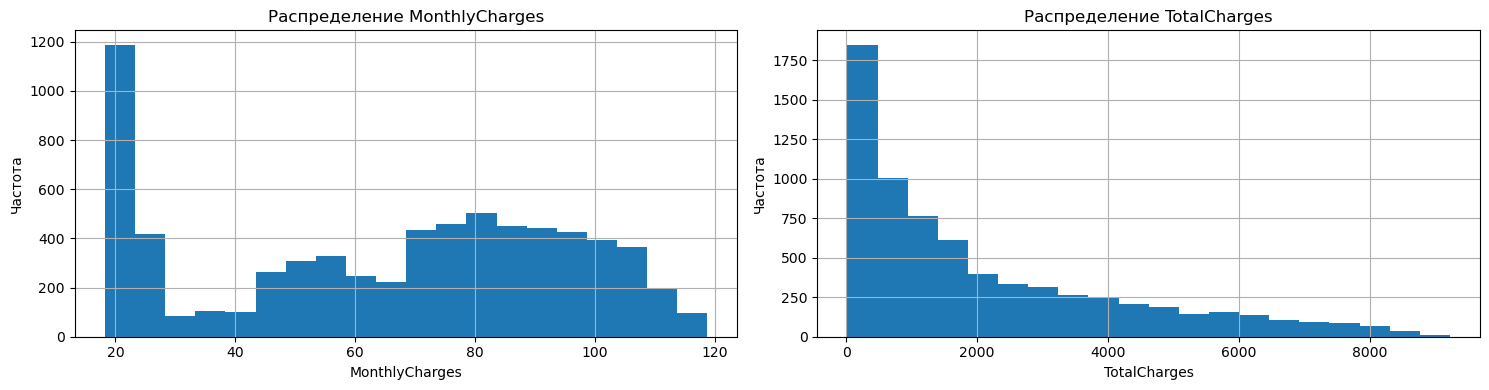

-----------------------------------------------------------------------------------------------------------------------------

11. Корреляционная матрица:


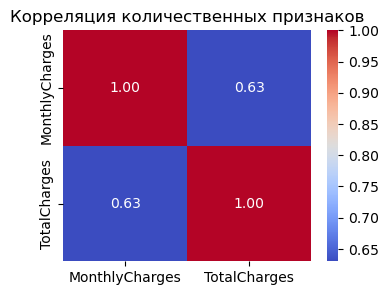

-----------------------------------------------------------------------------------------------------------------------------

12. Распределение категориальных признаков (category):


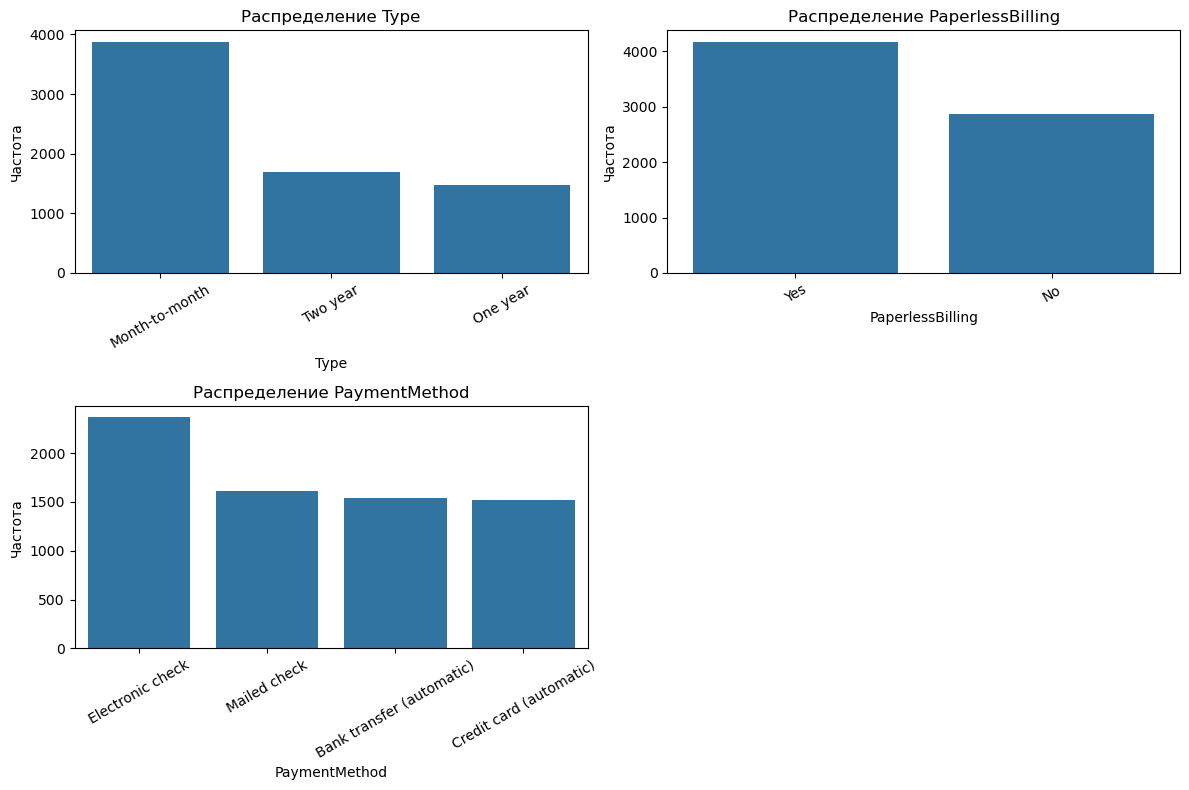

-----------------------------------------------------------------------------------------------------------------------------

🔍 Анализ таблицы: internet
1. Первые 5 строк данных:


customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No

-----------------------------------------------------------------------------------------------------------------------------

2. Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5517 non-null   object  
 1   InternetService   5517 non-null   category
 2   OnlineSecurity    5517 non-null   category
 3   OnlineBackup      5517 non-null   category
 4   DeviceProtection  5517 non-null   category
 5   TechSupport       5517 non-null   category
 6   StreamingTV       5517 non-null   category
 7   StreamingMovies   5517 non-null   category
dtypes: category(7), object(1)
memory usage: 81.8+ KB
-----------------------------------------------------------------------------------------------------------------------------

3. Проверка пропусков:


Empty DataFrame
Columns: [Пропуски (абсолютные), Пропуски (%)]
Index: []

-----------------------------------------------------------------------------------------------------------------------------

4. В таблице нет количественных данных.
-----------------------------------------------------------------------------------------------------------------------------

5. Количество уникальных значений в данных:


customerID          5517
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------

6. Уникальные значения для категориальных столбцов:

Столбец 'customerID': 5517 уникальных значений
customerID
7590-VHVEG    1
5181-OABFK    1
9356-AXGMP    1
5176-OLSKT    1
7508-DQAKK    1
Name: count, dtype: int64

Столбец 'InternetService': 2 уникальных значений
InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64

Столбец 'OnlineSecurity': 2 уникальных значений
OnlineSecurity
No     3498
Yes    2019
Name: count, dtype: int64

Столбец 'OnlineBackup': 2 уникальных значений
OnlineBackup
No     3088
Yes    2429
Name: count, dtype: int64

Столбец 'DeviceProtection': 2 уникальных значений
DeviceProtection
No     3095
Yes    2422
Name: count, dtype: int64

Столбец 'TechSupport': 2 уникальных значений
TechSupport
No     3473
Yes    2044
Name: count, dtype: int64

Столбец 'StreamingTV': 2 уникальных значений
StreamingTV
No     2810
Yes 

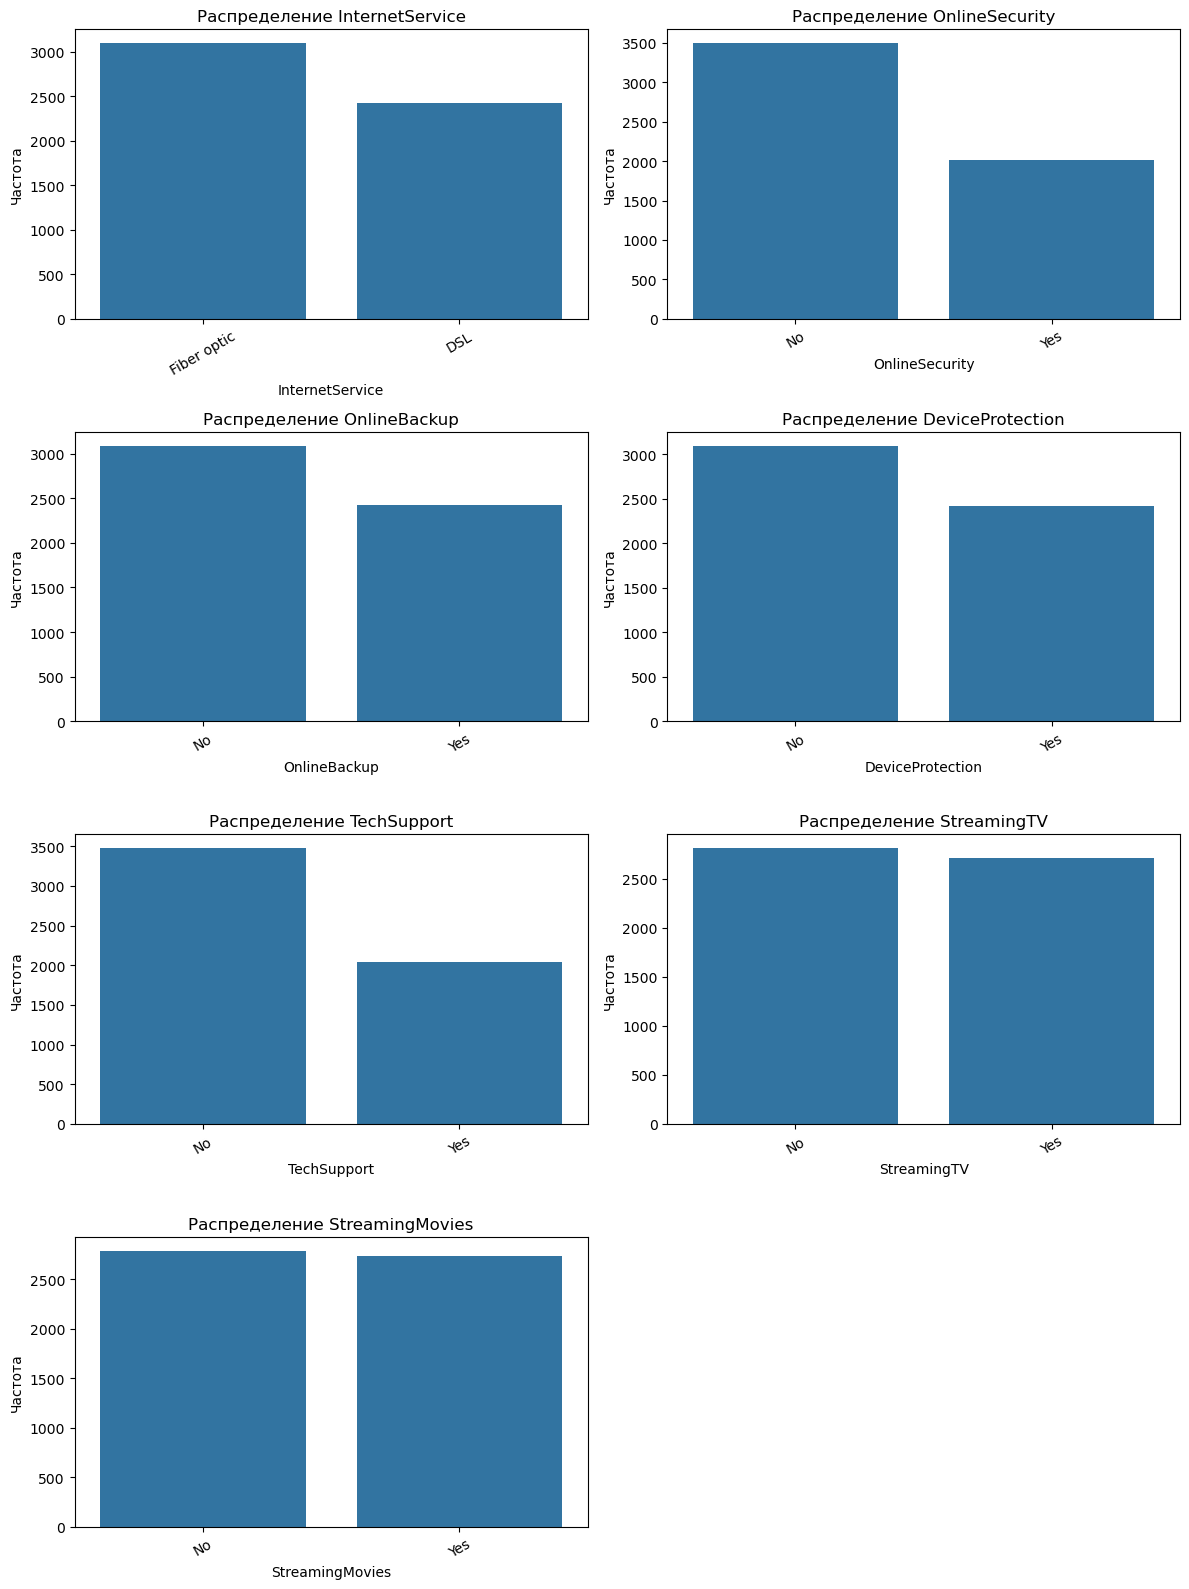

-----------------------------------------------------------------------------------------------------------------------------

🔍 Анализ таблицы: personal
1. Первые 5 строк данных:


customerID  gender SeniorCitizen Partner Dependents
0  7590-VHVEG  Female             0     Yes         No
1  5575-GNVDE    Male             0      No         No
2  3668-QPYBK    Male             0      No         No
3  7795-CFOCW    Male             0      No         No
4  9237-HQITU  Female             0      No         No

-----------------------------------------------------------------------------------------------------------------------------

2. Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customerID     7043 non-null   object  
 1   gender         7043 non-null   category
 2   SeniorCitizen  7043 non-null   category
 3   Partner        7043 non-null   category
 4   Dependents     7043 non-null   category
dtypes: category(4), object(1)
memory usage: 83.1+ KB
-----------------------------------------------------------------------------------------------------------------------------

3. Проверка пропусков:


Empty DataFrame
Columns: [Пропуски (абсолютные), Пропуски (%)]
Index: []

-----------------------------------------------------------------------------------------------------------------------------

4. В таблице нет количественных данных.
-----------------------------------------------------------------------------------------------------------------------------

5. Количество уникальных значений в данных:


customerID       7043
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------

6. Уникальные значения для категориальных столбцов:

Столбец 'customerID': 7043 уникальных значений
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
Name: count, dtype: int64

Столбец 'gender': 2 уникальных значений
gender
Male      3555
Female    3488
Name: count, dtype: int64

Столбец 'SeniorCitizen': 2 уникальных значений
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Столбец 'Partner': 2 уникальных значений
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Столбец 'Dependents': 2 уникальных значений
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------

7. Проверка на дубликаты:
Дубликатов не найдено.
--------------------------------------------------------------

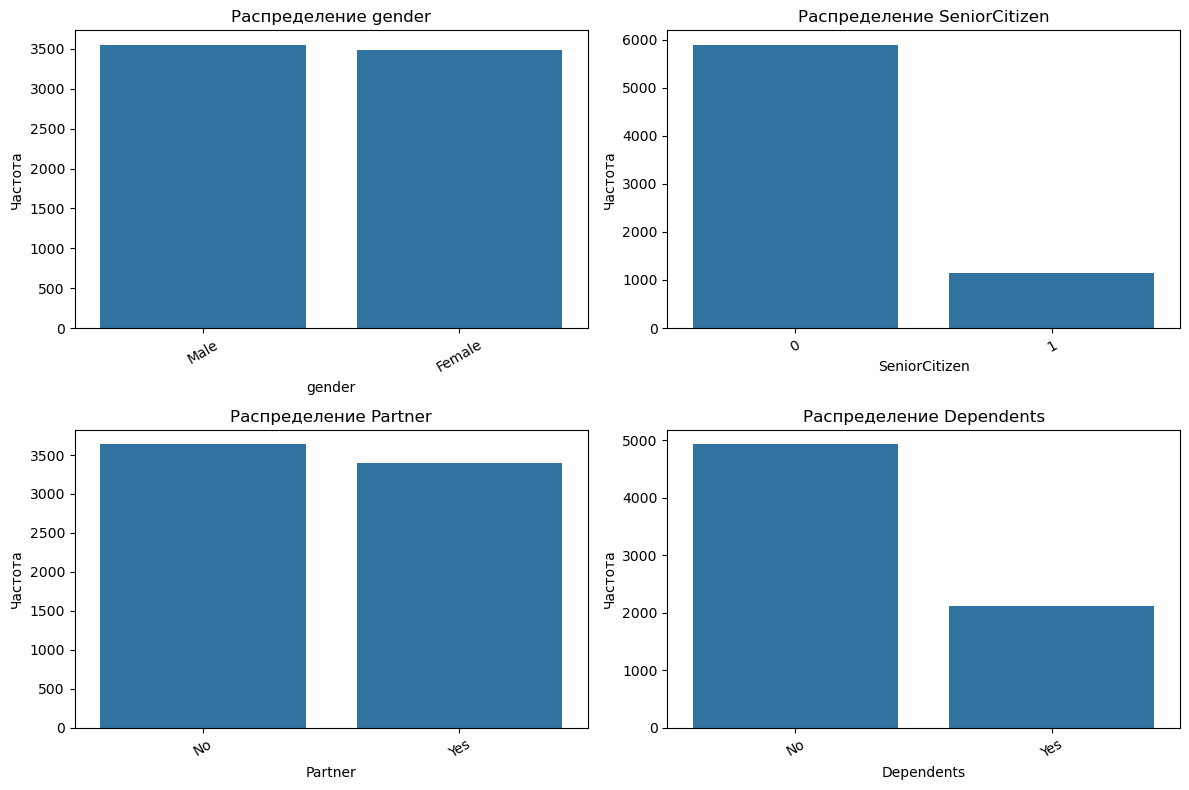

-----------------------------------------------------------------------------------------------------------------------------

🔍 Анализ таблицы: phone
1. Первые 5 строк данных:


CustomerId MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

-----------------------------------------------------------------------------------------------------------------------------

2. Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CustomerId     6361 non-null   object  
 1   MultipleLines  6361 non-null   category
dtypes: category(1), object(1)
memory usage: 56.2+ KB
-----------------------------------------------------------------------------------------------------------------------------

3. Проверка пропусков:


Empty DataFrame
Columns: [Пропуски (абсолютные), Пропуски (%)]
Index: []

-----------------------------------------------------------------------------------------------------------------------------

4. В таблице нет количественных данных.
-----------------------------------------------------------------------------------------------------------------------------

5. Количество уникальных значений в данных:


CustomerId       6361
MultipleLines       2
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------

6. Уникальные значения для категориальных столбцов:

Столбец 'CustomerId': 6361 уникальных значений
CustomerId
5575-GNVDE    1
0980-FEXWF    1
8082-GHXOP    1
3393-FMZPV    1
8701-DGLVH    1
Name: count, dtype: int64

Столбец 'MultipleLines': 2 уникальных значений
MultipleLines
No     3390
Yes    2971
Name: count, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------

7. Проверка на дубликаты:
Дубликатов не найдено.
-----------------------------------------------------------------------------------------------------------------------------

8. Проверка индексов на монотонность: True
Минимальный и максимальный индекс: 0 6360
-----------------------------------------------------------------------------------------------------------------------------
------------------------------

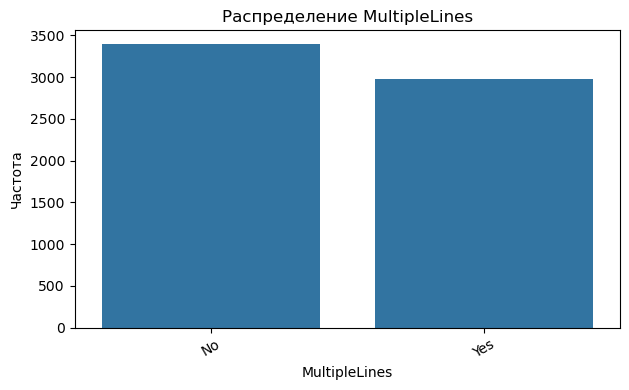

-----------------------------------------------------------------------------------------------------------------------------


In [17]:
for table_name, df in tables_data.items():
    print(f"\n🔍 Анализ таблицы: {table_name}")
    data_overview(df)

**Вывод по первичному обзору данных**  

🔍 **1. Общая структура данных**  
Данные содержат **4 основные таблицы**:
- **`contract`** (7043 записи) – информация о договорах, тарифах и платежах.
- **`internet`** (5517 записей) – сведения об интернет-услугах.
- **`personal`** (7043 записи) – демографические данные клиентов.
- **`phone`** (6361 запись) – данные об услугах телефонии.

В каждой таблице **основной идентификатор – `customerID`** (в `phone` – `Customerid`). Необходимо привести к однообразному названию. 
В названия столбцов привести к змеиному регистру.

---

📊 **2. Пропущенные значения**
✅ В целом **пропусков немного**, за исключением:
- **`contract` → `TotalCharges`** – **11 пропусков** (~0.16%).  
---

🔢 **3. Количественные данные**
- **Только в `contract` есть числовые признаки**:
  - `MonthlyCharges` (ежемесячные платежи)
  - `TotalCharges` (общие расходы)
- Распределение `TotalCharges` показывает **сильную асимметрию** (многие клиенты имеют низкие затраты, а максимальное значение ≈ 9221).

**Рекомендации:**  
📌 Можно рассмотреть **логарифмирование** `TotalCharges` для нормализации, если метрика на таком наборе данных будет низка.

---

🔠 **4. Категориальные признаки**
Практически большинство признаков имеют тип 
- Основные категориальные признаки:
  - **Тип контракта** (`Type` – `Month-to-month`, `One year`, `Two year`).
  - **Оплата** (`PaperlessBilling`, `PaymentMethod`).
  - **Интернет-услуги** (`InternetService`, `StreamingTV`, `OnlineBackup` и др.).
  - **Телефония** (`MultipleLines`).
  - **Демография** (`gender`, `SeniorCitizen`, `Partner`, `Dependents`).

**Вывод:**  
📌 Категориальные переменные бинарны (`Yes/No`) или имеют ≤ 4 значений, что удобно для **one-hot encoding**.

---

📉 **5. Дубликаты**
- ✅ **Дубликатов нет** – уникальные `customerID` во всех таблицах.
---

🏷 **6. Ошибки в данных**
- `EndDate` в `contract` записан как `object`, но содержит как даты (`YYYY-MM-DD`), так и `No` (действующий клиент).
  ➝ **Решение**: заменить `No` на `NaN`, а `EndDate` привести к `datetime`.
---

**7. Визуализация данных**

📊 **Гистограммы количественных данных**:
- `MonthlyCharges` – имеет значительный пик при малых значениях.
- `TotalCharges` – значительное число клиентов с **нулевыми или низкими затратами**.

📈 **Корреляция**:
- `MonthlyCharges` и `TotalCharges` имеют **сильную связь** (ожидаемо).

📊 **Распределение категориальных признаков**:
- **70% клиентов** имеют контракт `Month-to-month`.
- Самый популярный способ оплаты – `Electronic check` (≈ 33%).
- Большинство признаков не имеют значительного дисбаланса между классами, за исключением `SeniorCitizen`, что является логичным.

**📌 Дальнейшие действия**
- 1️⃣ **Обработать пропущенные значения в `TotalCharges`**.  
- 2️⃣ **Привести `EndDate` к `datetime`**.  
- 3️⃣ **Рассмотреть логарифмирование `TotalCharges`** для нормализации.  
- 4️⃣ **Категориальные признаки перевести в one-hot encoding**.  
- 5️⃣ **Сделать индексами `customerID`, `CustomerId` перед ML-анализом**, так как это не информативный признаки, но перевод их в индексы позволит индефицировать данные модели.

**Общий вывод по разделу 1: Подключение к базе данных и первичный обзор данных**  

В данном разделе была проведена загрузка данных из **SQLite**, их первичный анализ и предварительная обработка.  

**Что было сделано:**  
✅ Подключение к базе данных и выгрузка таблиц **contract, internet, personal, phone**.  
✅ Определение структуры таблиц и проверка пропусков.  
✅ Приведение типов данных (например, преобразование **EndDate** и числовых столбцов).  
✅ Исследование распределения признаков, выявление особенностей категориальных и числовых данных.  
✅ Визуальный анализ гистограмм количественных переменных и распределения категорий.  
✅ Проверка наличия дубликатов и корректности индексов.  

**Общий вывод:**  
Данные имеют четкую структуру и небольшое количество пропусков. Основной целевой признак (**EndDate**) требует предварительной обработки. Категориальные признаки удобно кодировать, а числовые данные могут потребовать трансформации для лучшего обучения модели. Дубликаты отсутствуют, что упрощает дальнейшую работу с данными. На следующем этапе потребуется предобработка данных, включая обработку пропусков, преобразование признаков и подготовку данных для моделирования.

## Предобработка данных

### Стиль заголовков

Переведем стиль заголоков в "змеиный" стиль

In [18]:
# Применяем ко всем таблицам
for table_name, df in tables_data.items():
    df.columns = [to_snake_case(col) for col in df.columns]
    tables_data[table_name] = df  # Обновляем DataFrame в словаре
    print('ℹ️ Таблица:', table_name)
    print(tables_data[table_name].columns)
    print(LINE_1)

print("\n✅ Все заголовки переведены в snake_case!")



ℹ️ Таблица: contract
Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')
-----------------------------------------------------------------------------------------------------------------------------
ℹ️ Таблица: internet
Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')
-----------------------------------------------------------------------------------------------------------------------------
ℹ️ Таблица: personal
Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')
-----------------------------------------------------------------------------------------------------------------------------
ℹ️ Таблица: phone
Index(['customer_id', 'multiple_lines'], dtype='object')
-------------------------------------------

### Обработка пропущенных значений в `TotalCharges`

### Объединение таблиц

In [19]:
# Для удобства сохраним каждую таблицу в одельную переменную
df_contract = tables_data['contract']
df_internet = tables_data['internet']
df_personal = tables_data['personal']
df_phone = tables_data['phone']